# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import numpy as np
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import linregress
from pprint import pprint
from citipy import citipy

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Generate a list of random locations
np.random.seed()
ntot=2000
Lat_list=[np.random.uniform(-90.0,90.0) for x in range(ntot)]
Lng_list=[np.random.uniform(-180.0,180.0) for x in range(ntot)]

## Generate Cities List

In [2]:
# Gnerate Cities list
city_list=[citipy.nearest_city(Lat_list[i],Lng_list[i]) for i in range(ntot)]

# Delete the duplicated cities
city_list = list(dict.fromkeys(city_list))

# print the number of cities
len(city_list)
#type(city_list[0].city_name)

757

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
city_name_list=[]
city_lat_list=[]
city_lon_list=[]
city_mtemp_list=[]
city_hum_list=[]
city_cl_list=[]
city_wind_list=[]
city_ctr_list=[]
city_dt_list=[]

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the city_list and retrieve the weather data for each city
for city in city_list:
    try: 
        response = requests.get(query_url + city.city_name).json()
        city_name_list.append(response["name"])
        city_lat_list.append(response["coord"]["lat"])
        city_lon_list.append(response["coord"]["lon"])
        city_mtemp_list.append(response["main"]["temp_max"])
        city_hum_list.append(response["main"]["humidity"])
        city_cl_list.append(response["clouds"]["all"])
        city_wind_list.append(response["wind"]["speed"])
        city_ctr_list.append(response["sys"]["country"])
        city_dt_list.append(response["dt"])
        print(f"Retrieved data of {response['name']}")
        
    # Throw an error message if the city is not found 
    except:
        print("City not found. Skipping")

print("-----------------------------")
print("Data Retrieval Complete   ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Retrieved data of Aripuanã
City not found. Skipping
City not found. Skipping
Retrieved data of Jamestown
Retrieved data of Bluff
Retrieved data of Narsaq
Retrieved data of Hong Kong
Retrieved data of Thompson
Retrieved data of Punta Arenas
Retrieved data of Bac Lieu
Retrieved data of Hermanus
Retrieved data of Lebu
Retrieved data of Pevek
Retrieved data of Mataura
Retrieved data of Fortuna
Retrieved data of Rancagua
Retrieved data of Port Elizabeth
Retrieved data of Cherskiy
Retrieved data of Atuona
Retrieved data of Saiha
City not found. Skipping
Retrieved data of Havelock
City not found. Skipping
Retrieved data of Aloleng
Retrieved data of Busselton
City not found. Skipping
Retrieved data of Mabaruma
Retrieved data of Provideniya
Retrieved data of Puerto Ayora
Retrieved data of Koumac
City not found. Skipping
Retrieved data of Chui
Retrieved data of Forsytheganj
Retrieved data of Qaanaaq
Retrieved data of Gubkinskiy
Retrieved dat

Retrieved data of Yakeshi
Retrieved data of Gisborne
Retrieved data of St. George's
Retrieved data of Norman Wells
Retrieved data of Champerico
Retrieved data of Brae
Retrieved data of São Miguel do Araguaia
Retrieved data of Presidente Epitácio
Retrieved data of Arua
Retrieved data of Vostok
Retrieved data of ‘Āhuimanu
Retrieved data of Yarkovo
Retrieved data of Kiryat Gat
Retrieved data of Aizkraukle
Retrieved data of Karapyshi
Retrieved data of Doha
City not found. Skipping
Retrieved data of Whyalla
Retrieved data of Bykovo
Retrieved data of Sacramento
Retrieved data of Akola
Retrieved data of Lovozero
Retrieved data of Shahreza
City not found. Skipping
Retrieved data of Kaitong
Retrieved data of Tateyama
City not found. Skipping
Retrieved data of Saint George
Retrieved data of Lavrentiya
Retrieved data of Kumul
Retrieved data of Kavaratti
Retrieved data of Sri Aman
Retrieved data of Vila Franca do Campo
Retrieved data of Zyryanka
Retrieved data of Half Moon Bay
Retrieved data of Ma

Retrieved data of San Miguel de Tucumán
Retrieved data of Bereda
Retrieved data of Bose
Retrieved data of Xichang
Retrieved data of Brazzaville
Retrieved data of Faya
Retrieved data of Hualmay
Retrieved data of Orangeville
City not found. Skipping
Retrieved data of Seoni
City not found. Skipping
Retrieved data of Sesheke
Retrieved data of Teberda
Retrieved data of Qarqīn
Retrieved data of Wairoa
Retrieved data of Prattville
Retrieved data of Bay Roberts
Retrieved data of Calvinia
Retrieved data of Fare
Retrieved data of Médéa
Retrieved data of Kindersley
Retrieved data of Baijiantan
Retrieved data of La Asuncion
Retrieved data of Melo
City not found. Skipping
City not found. Skipping
Retrieved data of Lanzhou
City not found. Skipping
Retrieved data of Kruisfontein
Retrieved data of Aranos
Retrieved data of Saint-Pierre
Retrieved data of Inta
Retrieved data of Kamenka
Retrieved data of Pahrump
Retrieved data of Dubbo
Retrieved data of San Vicente
Retrieved data of Yafran
Retrieved data 

In [5]:
# print out the number of city list
len(city_name_list)

703

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dataframe
ct_df=pd.DataFrame({"City":city_name_list,
                   "Lat":city_lat_list,
                   "Lng":city_lon_list,
                   "Max Temp":city_mtemp_list,
                   "Humidity":city_hum_list,
                   "Cloudiness":city_cl_list,
                   "Wind Speed":city_wind_list,
                   "Country":city_ctr_list,
                   "Date":city_dt_list})

# Display the dataframe
ct_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aripuanã,-9.1667,-60.6333,85.60,59,70,1.92,BR,1610455845
1,Jamestown,42.0970,-79.2353,27.00,80,90,6.91,US,1610455581
2,Bluff,-46.6000,168.3333,52.00,84,16,1.01,NZ,1610455847
3,Narsaq,60.9167,-46.0500,42.80,33,75,20.71,GL,1610455848
4,Hong Kong,22.2855,114.1577,55.99,30,37,11.16,HK,1610455586
...,...,...,...,...,...,...,...,...,...
698,Muskegon,43.3000,-86.1334,35.60,80,90,14.97,US,1610456157
699,Mahina,-17.5065,-149.4890,77.00,78,75,3.44,PF,1610456255
700,Kushiro,42.9750,144.3747,23.00,93,75,10.36,JP,1610456255
701,Haines Junction,60.7522,-137.5108,8.60,92,99,1.14,CA,1610456256


In [7]:
# Clean the duplicated data
ct_df.drop_duplicates(subset=["City"],inplace=True)
ct_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aripuanã,-9.1667,-60.6333,85.60,59,70,1.92,BR,1610455845
1,Jamestown,42.0970,-79.2353,27.00,80,90,6.91,US,1610455581
2,Bluff,-46.6000,168.3333,52.00,84,16,1.01,NZ,1610455847
3,Narsaq,60.9167,-46.0500,42.80,33,75,20.71,GL,1610455848
4,Hong Kong,22.2855,114.1577,55.99,30,37,11.16,HK,1610455586
...,...,...,...,...,...,...,...,...,...
698,Muskegon,43.3000,-86.1334,35.60,80,90,14.97,US,1610456157
699,Mahina,-17.5065,-149.4890,77.00,78,75,3.44,PF,1610456255
700,Kushiro,42.9750,144.3747,23.00,93,75,10.36,JP,1610456255
701,Haines Junction,60.7522,-137.5108,8.60,92,99,1.14,CA,1610456256


In [8]:
# show a summary of the data
ct_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,6.980000e+02
mean,19.656105,20.212721,49.373739,73.247851,55.485673,8.104212,1.610456e+09
std,33.179143,90.398373,34.104088,21.277025,40.668488,5.984670,1.328405e+02
min,-54.800000,-179.166700,-50.420000,1.000000,0.000000,0.110000,1.610455e+09
25%,-8.886850,-59.574600,28.000000,63.000000,4.250000,3.447500,1.610456e+09
50%,24.390550,25.412700,59.000000,80.000000,75.000000,6.835000,1.610456e+09
75%,49.108375,98.521900,78.305000,88.000000,97.000000,10.870000,1.610456e+09
max,78.218600,179.316700,103.770000,100.000000,100.000000,36.820000,1.610456e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
ct_df[ct_df["Humidity"]>100].index

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=ct_df.drop(ct_df[ct_df["Humidity"]>100].index,inplace=False)
clean_city_data.to_csv("../output_data/city_data.csv",index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

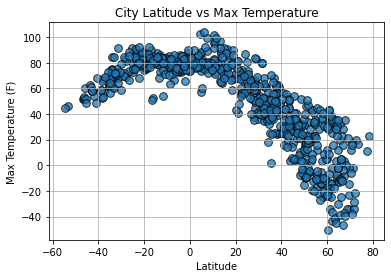

In [11]:
# Plot the scatter plot of Latitude vs. Temperature
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"], s=60,alpha=0.75,edgecolors="black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature")
plt.savefig("../output_data/Fig1_LatvsTemp.png")
plt.show()

* Temperature is higher when we approach equator.

## Latitude vs. Humidity Plot

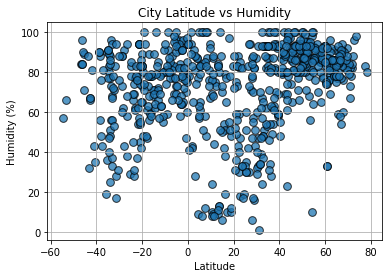

In [12]:
# Plot the scatter plot of Latitude vs. Humidity
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"], s=60,alpha=0.75,edgecolors="black")
plt.grid(True)
#plt.xlim(-90,90)
#plt.ylim(0,110)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.savefig("../output_data/Fig2_LatvsHum.png")
plt.show()

* Effect of latitude on humidity is not as stronger as that on temperature

## Latitude vs. Cloudiness Plot

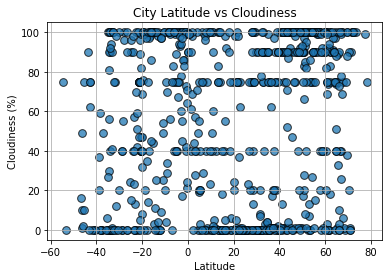

In [13]:
# Plot the scatter plot of Latitude vs. Cloudiness
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"], s=60,alpha=0.75,edgecolors="black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.savefig("../output_data/Fig3_LatvsCloud.png")
plt.show()

* Cloudiness is irrelavant to latitude.

## Latitude vs. Wind Speed Plot

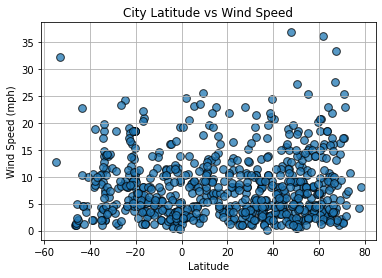

In [14]:
# Plot the scatter plot of Latitude vs. Wind Speed
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"], s=60,alpha=0.75,edgecolors="black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.savefig("../output_data/Fig4_LatvsWSpeed.png")
plt.show()

* Wind speed is also irrelavant to latitude.

## Linear Regression

In [15]:
# Extract the city info in north and south hemisphere
NCity=clean_city_data.loc[clean_city_data["Lat"]>=0]
SCity=clean_city_data.loc[clean_city_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7320079411085507


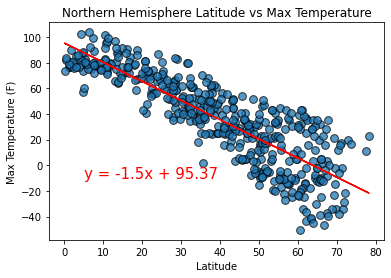

In [16]:
# Extract lattitude and temperature info
x_lat = NCity['Lat']
y_temp = NCity['Max Temp']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_temp)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_temp, s=60,alpha=0.75,edgecolors="black")
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(5,-10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere Latitude vs Max Temperature")
plt.savefig("../output_data/Fig5_NLatvsTemp.png")
plt.show()

* The latitude has a strong negative relationship with temperature in norther hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.35006918762324235


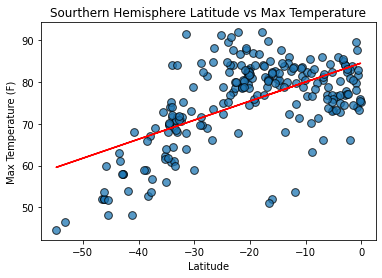

In [17]:
# Extract lattitude and temperature info
x_lat = SCity['Lat']
y_temp = SCity['Max Temp']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_temp)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_temp, s=60,alpha=0.75,edgecolors="black")
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,95),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Sourthern Hemisphere Latitude vs Max Temperature")
plt.savefig("../output_data/Fig6_SLatvsTemp.png")
plt.show()

* The latitude has a strong positive relationship with temperature in southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1518718820362699


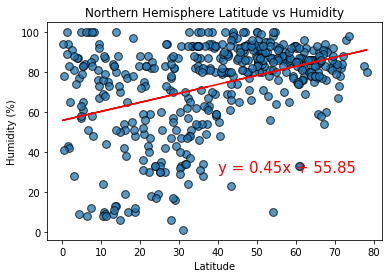

In [18]:
# Extract lattitude and humidity info
x_lat = NCity['Lat']
y_hum = NCity['Humidity']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_hum)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_hum, s=60,alpha=0.75,edgecolors="black")
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Latitude vs Humidity")
plt.savefig("../output_data/Fig7_NLatvsHum.png")
plt.show()

* The latitude has a weak positive relationship with temperature in northerm hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.057152481995305794


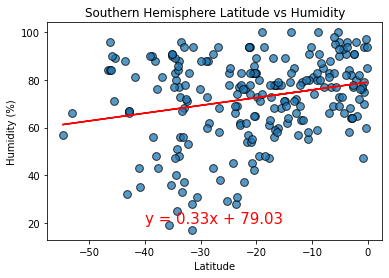

In [19]:
# Extract lattitude and humidity info
x_lat = SCity['Lat']
y_hum = SCity['Humidity']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_hum)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_hum, s=60,alpha=0.75,edgecolors="black")
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Latitude vs Humidity")
plt.savefig("../output_data/Fig8_SLatvsHum.png")
plt.show()

* The latitude has a weak positive relationship with temperature in southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06399817978823429


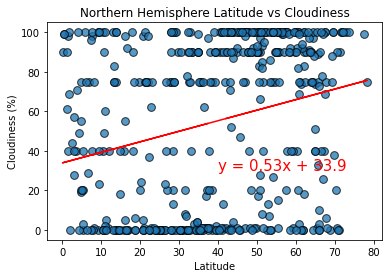

In [20]:
# Extract lattitude and cloudiness info
x_lat = NCity['Lat']
y_cl = NCity['Cloudiness']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cl)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_cl, s=60,alpha=0.75,edgecolors="black")
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Latitude vs Cloudiness")
plt.savefig("../output_data/Fig9_NLatvsCloud.png")
plt.show()

* Lattitude has litter effect on cloudiness in northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11622044810382189


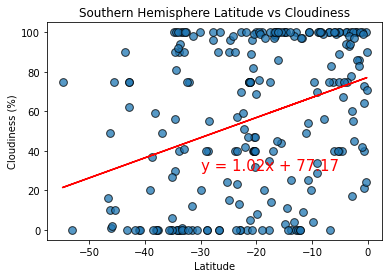

In [21]:
# Extract lattitude and cloudiness info
x_lat = SCity['Lat']
y_cl = SCity['Cloudiness']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cl)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_cl, s=60,alpha=0.75,edgecolors="black")
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere Latitude vs Cloudiness")
plt.savefig("../output_data/Fig10_sLatvsCloud.png")
plt.show()

* Lattitude has litter effect on cloudiness in southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0017095952374758712


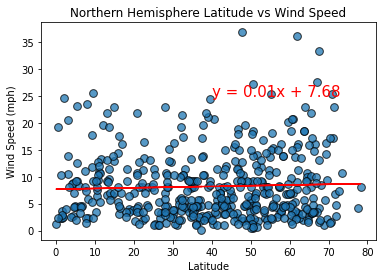

In [22]:
# Extract lattitude and wind speed info
x_lat = NCity['Lat']
y_ws = NCity['Wind Speed']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_ws)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_ws, s=60,alpha=0.75,edgecolors="black")
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere Latitude vs Wind Speed")
plt.savefig("../output_data/Fig11_NLatvsWSpeed.png")
plt.show()

* Lattitude has litter effect on wind speed in northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.017868993871706478


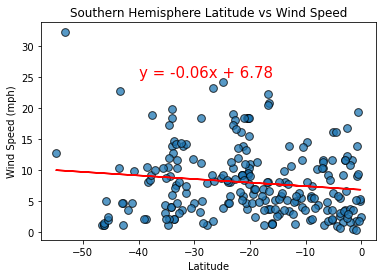

In [23]:
# Extract lattitude and wind speed info
x_lat = SCity['Lat']
y_ws = SCity['Wind Speed']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_ws)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_ws, s=60,alpha=0.75,edgecolors="black")
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere Latitude vs Wind Speed")
plt.savefig("../output_data/Fig12_SLatvsWSpeed.png")
plt.show()

* Lattitude has litter effect on wind speed in sourthern hemisphere.